# RETOS - Actividad Guiada 2
Nombre: Alvaro Sanchez Rocamora<br>
URL: 

https://github.com/asancroc/03MIAR-Algoritmos-de-Optimizacion/tree/master/RETOS
<br>

In [145]:
import time
import matplotlib.pyplot as plt
import random
import numpy as np


### RETO 1 - Implementar el algoritmo de la Criba de Erastótenes para encontrar número primos

In [146]:
# Criba de Erastótenes
# Escribe a ti tu código
def criba_erastoteles(n):
    # Seguimos el pseudocódigo compartido en las diapositivas
    
    # Crear una lista desde 2 a n
    # Inicializamos un array con los valores y otro con la
    # misma long pero booleano que hará de filtro
    array_num = np.arange(2, n+1)
    array_filter = np.ones(n-1, dtype=bool)

    # Para i desde 2 hasta la raiz de n
    for i in range(2, int(np.sqrt(n)) + 1):
        # Si i no esta marcada
        if array_filter[i-2] == True:
            # Para j desde i hasta n/i
            for j in range(i, int(n/i)+1):
                # Marcamos ixj
                array_filter[(i*j) - 2] = False

    # Filtramos el array de num con el array booleano
    # de marcados
    array_num = array_num[array_filter]
    
    # Imprimimos por pantalla el array de num primos
    print(array_num)

    return


In [147]:
# Ejecutamos la prueba
init = time.time()

criba_erastoteles(100)
print(f'Tiempo de cálculo {time.time() - init:.20f}s')

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Tiempo de cálculo 0.00100088119506835938s


### RETO 2 - Resolver el problema de las 8-Reinas

In [149]:
# Implementación de las funciones
def imprimir_tablero(tablero):
    for i in range(8):
        for j in range(8):
            if tablero[i] == j:
                print("♛", end="")
            else:
                print(". ", end="")
        print()

def es_viable(tablero, fila, columna):
    # Verifica si hay una reina en la columna
    for i in range(fila):
        if tablero[i] == columna:
            return False

    # Verifica si hay una reina en la diagonal superior izquierda
    i = fila - 1
    j = columna - 1
    while i >= 0 and j >= 0:
        if tablero[i] == j:
            return False
        i -= 1
        j -= 1

    # Verifica si hay una reina en la diagonal superior derecha
    i = fila - 1
    j = columna + 1
    while i >= 0 and j < 8:
        if tablero[i] == j:
            return False
        i -= 1
        j += 1

    return True

def resolver_8_reinas(tablero, fila):
    if fila == 8:
        # Caso en el que se colocan todas las reinas correctamente
        imprimir_tablero(tablero)
        return True

    for columna in range(8):
        if es_viable(tablero, fila, columna):
            tablero[fila] = columna
            if resolver_8_reinas(tablero, fila + 1):
                return True
            tablero[fila] = -1

    return False

In [150]:
# Resolución del problema de las 8 reinas con una única solución
# Inicializamos el tablero
tablero = [-1, -1, -1, -1, -1, -1, -1, -1,]

resolver_8_reinas(tablero, 0)

♛. . . . . . . 
. . . . ♛. . . 
. . . . . . . ♛
. . . . . ♛. . 
. . ♛. . . . . 
. . . . . . ♛. 
. ♛. . . . . . 
. . . ♛. . . . 


True

### RETO 3 - Resolver el problema de las Torres de Hanoi para un número arbitrario de fichas

In [151]:
# Torres de Hanoy
# Escribe aquí tu código
def hanoi(n, origen, auxiliar, destino):
    if n > 1:
        hanoi(n - 1, origen, destino, auxiliar)
        print(f"Mueve el disco {n} de {origen} a {destino}")
        hanoi(n - 1, auxiliar, origen, destino)

    else:
        print(f"Mueve el disco 1 de {origen} a {destino}")
        return

In [152]:
# Probamos el codigo
# Ejemplo usando 4 discos
# Los discos estan nombrados numericamente, donde el valor mas
# pequeño es el disco mas pequeño de tamaño
num_disc = 4

init = time.time()

hanoi(num_disc, "A", "B", "C")
print(f'Tiempo de cálculo {time.time() - init:.20f}s')

Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C
Mueve el disco 3 de A a B
Mueve el disco 1 de C a A
Mueve el disco 2 de C a B
Mueve el disco 1 de A a B
Mueve el disco 4 de A a C
Mueve el disco 1 de B a C
Mueve el disco 2 de B a A
Mueve el disco 1 de C a A
Mueve el disco 3 de B a C
Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C
Tiempo de cálculo 0.00000000000000000000s


### RETO 4 - Implementar el algoritmo del descenso por gradiente para el problema de la regresión lineal simple

En estadística, la regresión lineal es un enfoque lineal para modelizar la relación entre una variable dependiente y una o más variables independientes. Sea X la variable independiente e Y la variable dependiente. Definiremos una relación lineal entre estas dos variables como sigue:

Y = m*X + c

Ésta es la ecuación de una recta. Donde m es la pendiente de la recta y c es la intercepción con y. Estos valores nos los devolverá nuestra variable theta.


In [153]:
# Implementación del descenso
def descenso_gradiente(data, learning_rate, num_iteraciones):
    num_muestras, num_caracteristicas = data.shape
    X = data[:, 0]
    y = data[:, 1]
    
    # Inicializamos los parámetros theta a cero
    theta = np.zeros(num_caracteristicas)

    for _ in range(num_iteraciones):
        gradientes = np.zeros(num_caracteristicas)

        # Calculamos los gradientes para cada parámetro theta
        for i in range(num_muestras):
            error = np.dot(X[i], theta) - y[i]
            gradientes += error * X[i]

        # Actualizamos los parámetros theta utilizando el learning rate y los gradientes
        theta -= (learning_rate / num_muestras) * gradientes

    return theta

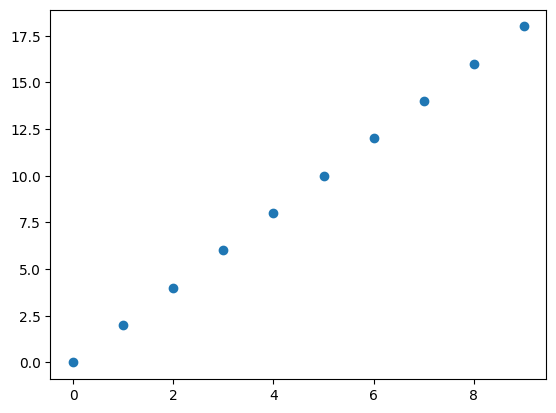

In [154]:
# Prueba del código
x = range(10)
y = [2*i for i in x]
data = np.array(list(zip(x,y)))

plt.scatter(x, y)
plt.show()

In [155]:
# Hiperparámetros
learning_rate = 0.00001
num_iteraciones = 1000

# Ejecutamos la funcion del descenso por gradiente
theta_optimo = descenso_gradiente(data, learning_rate, num_iteraciones)

print("Parámetros óptimos:")
print(theta_optimo)

Parámetros óptimos:
[0.49603258 0.49603258]


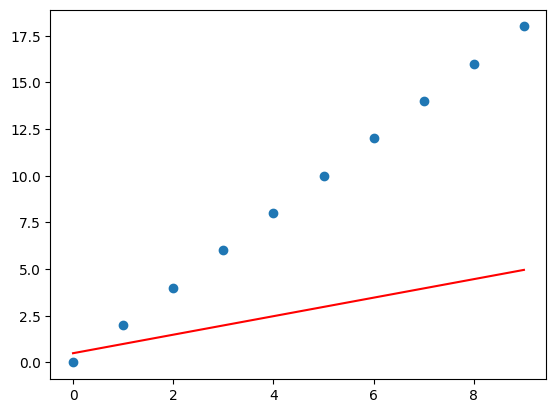

In [156]:
# Ploteamos el resultado
Y_pred = theta_optimo[0]*data[:, 0] + theta_optimo[1]

plt.scatter(data[:, 0], data[:, 1]) 
plt.plot([min(data[:, 0]), max(data[:, 0])], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

### RETO 5 - Mejorar la implementación de recocido simulado en la AG3 (TSP) eligiendo una generación de solución vecina con un grado de aleatoriedad menor

Se selecciona un nodo aleatorio i de manera similar a la solución anterior. Posteriormente, se crea una lista de vecinos candidatos excluyendo el nodo seleccionado i de la solución original. Esta alternativa reduce el grado de aleatoriedad al generar soluciones vecinas al limitar la elección del vecino a un conjunto de candidatos más restringido.

A continuación, se elige un vecino aleatorio j de la lista de vecinos candidatos de forma aleatoria. Esto garantiza que el vecino seleccionado sea diferente al nodo original i.

Finalmente, se genera la solución reemplazando el nodo seleccionado i por el vecino aleatorio j.

In [160]:
def genera_vecina_aleatorio(solucion):
    # Seleccionamos un nodo aleatorio
    i = random.randint(1, len(solucion)-1)
    
    # Generamos la lista de vecinos candidatos
    vecinos_candidatos = [nodo for nodo in solucion if nodo != solucion[i]]
    
    # Selecciona un vecino aleatorio de la lista de candidatos
    j = random.choice(vecinos_candidatos)
    
    # Reemplazammos el nodo seleccionado por el vecino aleatorio
    solucion[i], solucion[j] = solucion[j], solucion[i]
    
    return solucion